In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9)

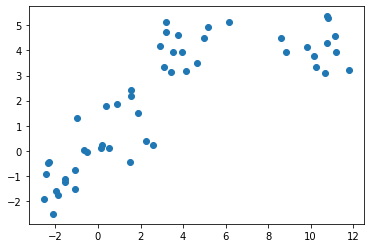

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [5]:
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

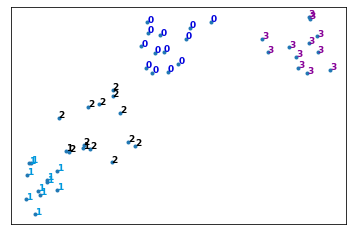

In [6]:
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight':'bold', 'size':9})
    
    
plt.xticks([])
plt.yticks([])

plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [7]:
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)

[[0.         0.21432642 0.55530601 ... 0.31563589 0.21583315 0.69740623]
 [0.21432642 0.         0.39531041 ... 0.17709657 0.11045701 0.52129071]
 [0.55530601 0.39531041 0.         ... 0.23985015 0.34030859 0.14974157]
 ...
 [0.31563589 0.17709657 0.23985015 ... 0.         0.10054317 0.38260086]
 [0.21583315 0.11045701 0.34030859 ... 0.10054317 0.         0.48158082]
 [0.69740623 0.52129071 0.14974157 ... 0.38260086 0.48158082 0.        ]]


In [8]:
Z = hierarchy.linkage(dist_matrix, 'average')

C:\Users\tawan\AppData\Local\Temp/ipykernel_11532/2305343628.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


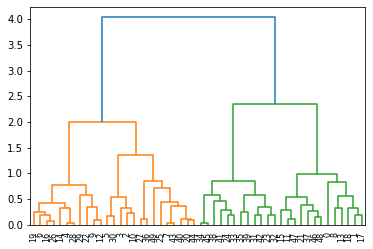

In [9]:
dendro = hierarchy.dendrogram(Z)

<h1 id="clustering_vehicle_dataset">Clustering on Vehicle dataset</h1>

In [10]:
!wget -O cars_clus.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv

--2021-11-11 09:53:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: 'cars_clus.csv'

     0K .......... .......                                    100% 33.7M=0.001s

2021-11-11 09:53:10 (33.7 MB/s) - 'cars_clus.csv' saved [17774/17774]



In [11]:
filename = 'cars_clus.csv'

pdf = pd.read_csv(filename)
print("Shape of dataset: ", pdf.shape)

pdf.head()

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [12]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [ ]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [15]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

<h2 id="clustering_using_scipy">Clustering using Scipy</h2>

In [19]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D       

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [20]:
import pylab
import scipy.cluster.hierarchy
Z2 = hierarchy.linkage(D, 'average')

C:\Users\tawan\AppData\Local\Temp/ipykernel_11532/1168290626.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z2 = hierarchy.linkage(D, 'average')


In [22]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z2, max_d, criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

In [24]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z2, k, criterion='maxclust')
clusters

array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

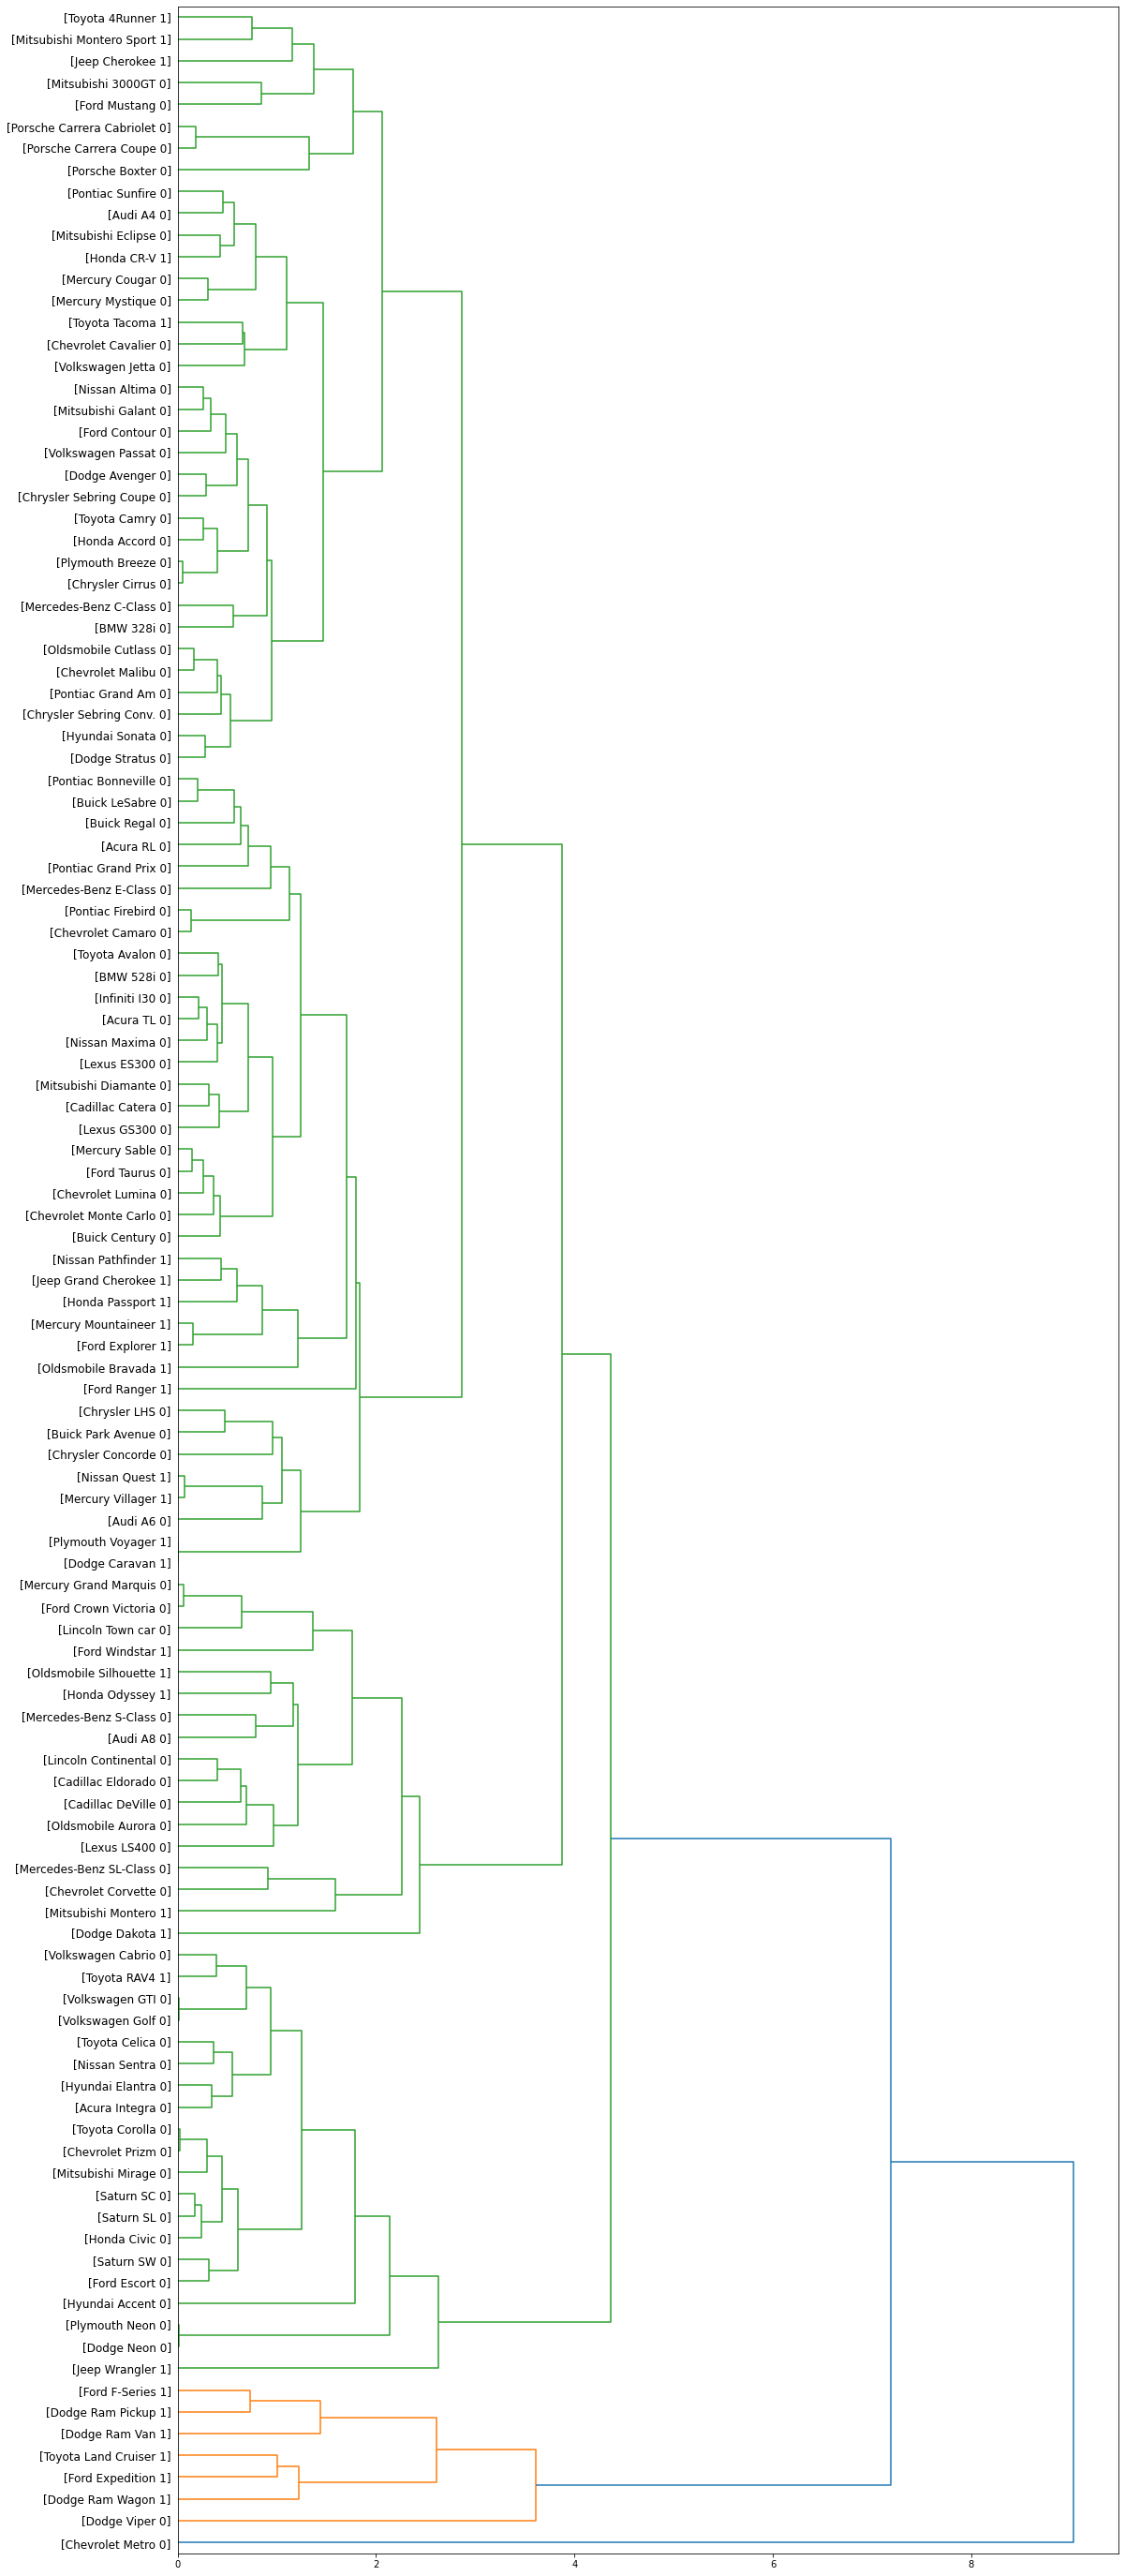

In [26]:
fig = pylab.figure(figsize=(18, 50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
dendro = hierarchy.dendrogram(Z2,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [27]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [28]:
Z2_using_dist_matrix = hierarchy.linkage(dist_matrix, 'average')

C:\Users\tawan\AppData\Local\Temp/ipykernel_11532/2032979403.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z2_using_dist_matrix = hierarchy.linkage(dist_matrix, 'average')


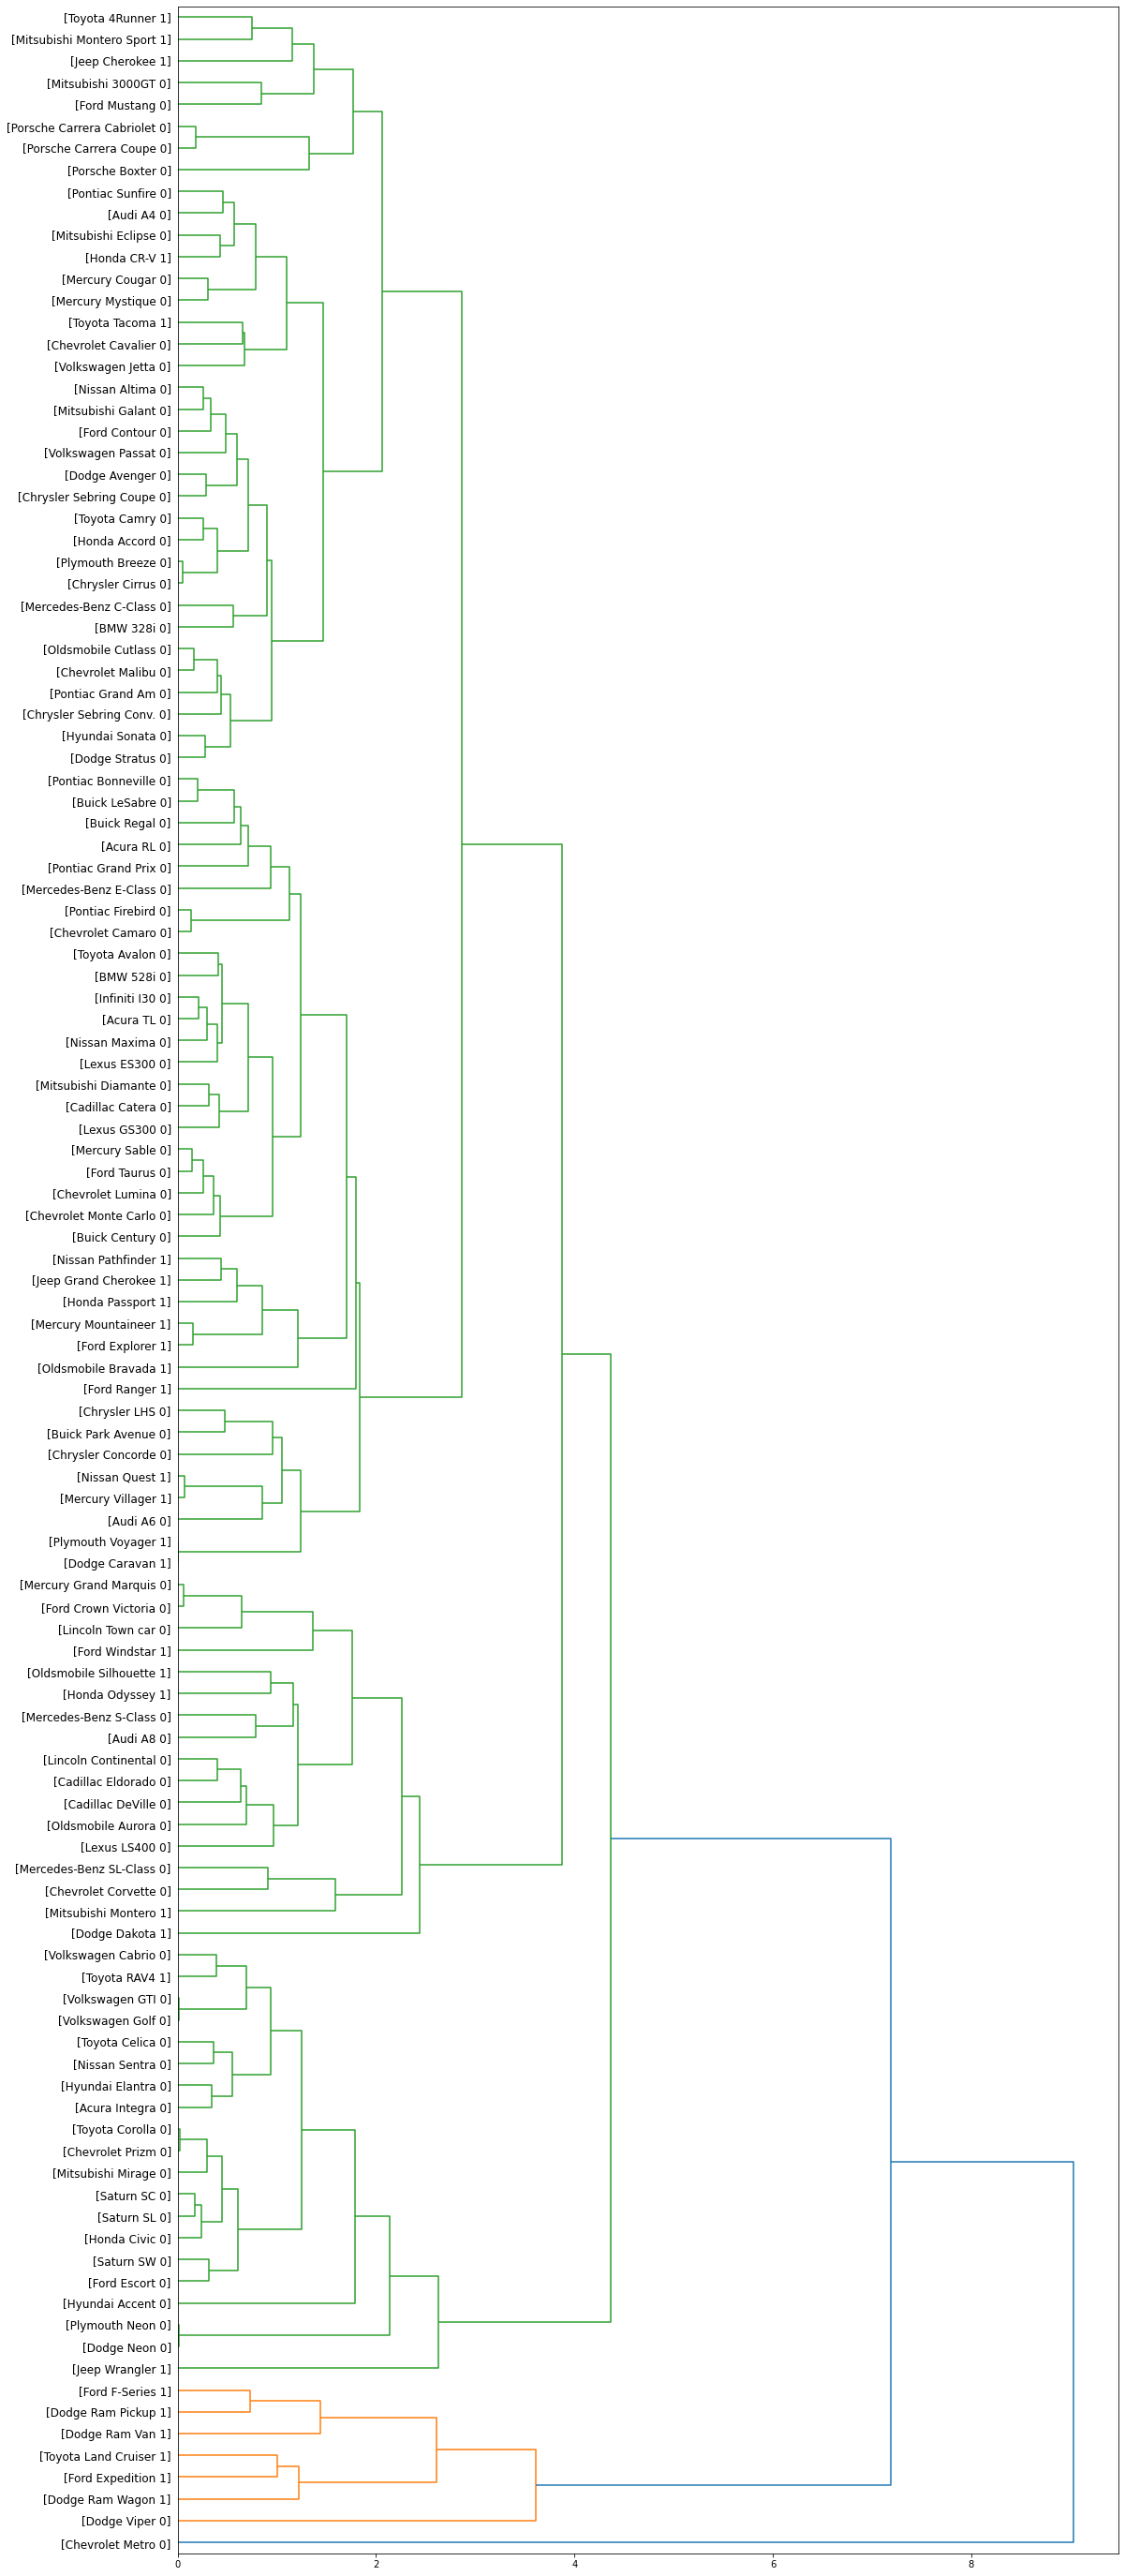

In [29]:
fig = pylab.figure(figsize=(18, 50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
dendro = hierarchy.dendrogram(Z2_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [30]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='average')
agglom.fit(dist_matrix)

agglom.labels_

C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 1,
       3, 0, 0, 0, 0, 0, 1, 0, 0, 5, 2, 2, 2, 4, 0, 1, 0, 0, 0, 4, 0, 4,
       2, 0, 2, 1, 0, 0, 0, 4, 1, 1, 0, 0, 1, 0, 0, 0, 0, 4, 4, 4, 1, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 1, 0, 0, 0, 0, 0, 4,
       0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 2, 1, 0, 0, 1, 1], dtype=int64)

In [31]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

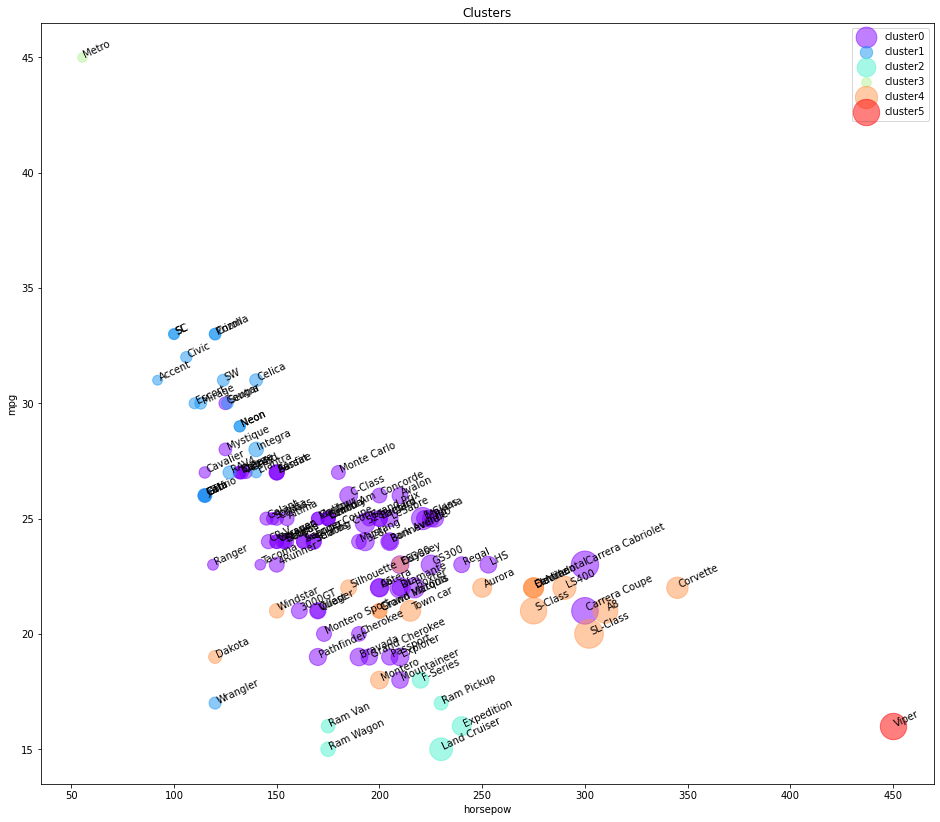

In [34]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)
    
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
plt.show();

In [35]:
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     56
          1.0     16
1         0.0     18
          1.0      2
2         1.0      6
3         0.0      1
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [36]:
agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()
agg_cars

C:\Users\tawan\AppData\Local\Temp/ipykernel_11532/405136514.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   182.696429  2.878571  24.746429  25.876643
         1.0   171.250000  3.175000  21.000000  23.235563
1        0.0   118.888889  1.866667  29.888889  14.142333
         1.0   123.500000  2.250000  22.000000  15.674000
2        1.0   211.666667  4.483333  16.166667  29.024667
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0   450.000000  8.000000  16.000000  69.725000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'mpg')

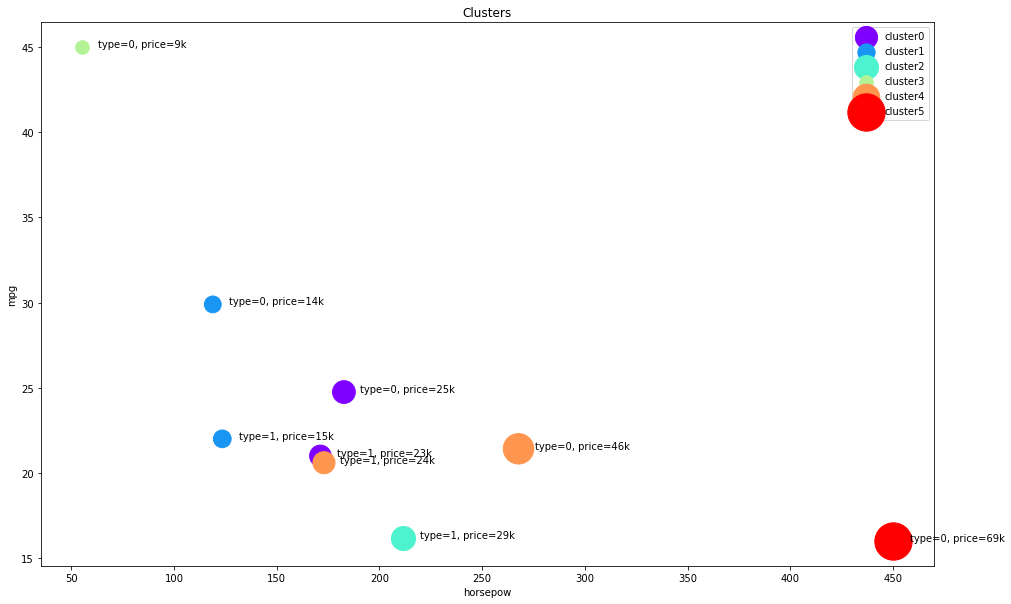

In [38]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+8, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')